In [1]:
#
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/EDU_data.csv')


In [2]:
# Display the first few rows of the dataset
print(data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
isna, isnull = data.isna().sum(), data.isnull().sum()
print(isna, isnull)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health     

In [3]:

# Handling missing values by filling with the median (for numeric) or mode (for categorical)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)


In [6]:
# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [7]:
print(data.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]


In [8]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('G3', axis=1))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['G3'], test_size=0.3, random_state=42)

In [10]:
#Linear Regression, Decision Tree Regressor,
# Random Forest Regressor, Support Vector Regressor (SVR), and an Artificial Neural Network (ANN).


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Artificial Neural Network (ANN)
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1, activation='linear'))

ann.compile(optimizer='adam', loss='mean_squared_error')
ann.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

y_pred_ann = ann.predict(X_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
models = {
    'Linear Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'SVR': y_pred_svr,
    'ANN': y_pred_ann.flatten()  # Flatten because it's returned as a 2D array
}

for model_name, y_pred in models.items():
    print(f"Results for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
    print("-"*30)


Results for Linear Regression:
Mean Absolute Error (MAE): 1.3996301412535035
Mean Squared Error (MSE): 4.511360147828825
Root Mean Squared Error (RMSE): 2.1239962683180083
R^2 Score: 0.7947708519011205
------------------------------
Results for Decision Tree:
Mean Absolute Error (MAE): 1.1176470588235294
Mean Squared Error (MSE): 3.8739495798319328
Root Mean Squared Error (RMSE): 1.9682351434297511
R^2 Score: 0.8237677006502018
------------------------------
Results for Random Forest:
Mean Absolute Error (MAE): 1.0246218487394958
Mean Squared Error (MSE): 2.9443117647058825
Root Mean Squared Error (RMSE): 1.7158996954093448
R^2 Score: 0.8660584445915037
------------------------------
Results for SVR:
Mean Absolute Error (MAE): 1.8714938598010482
Mean Squared Error (MSE): 8.409332758449084
Root Mean Squared Error (RMSE): 2.8998849560713755
R^2 Score: 0.617445705608962
------------------------------
Results for ANN:
Mean Absolute Error (MAE): 1.8883065916910893
Mean Squared Error (MSE): 

1. Linear Regression
MAE: 1.40
MSE: 4.51
RMSE: 2.12
R² Score: 0.79
Interpretation:
Linear Regression performed fairly well, with a decent R² score of 0.79, indicating that the model explains about 79% of the variance in the final grades (G3). The RMSE of 2.12 suggests that, on average, the model's predictions are about 2.12 grade points away from the actual values. This model is straightforward but may be missing some non-linear relationships in the data.

2. Decision Tree
MAE: 1.12
MSE: 3.87
RMSE: 1.97
R² Score: 0.82
Interpretation:
The Decision Tree Regressor outperformed Linear Regression, with lower MAE, MSE, and RMSE values. The R² score of 0.82 indicates a slightly better fit, suggesting that the model captures more complex patterns in the data. Decision Trees are good at handling non-linear relationships, which might explain the improved performance.

3. Random Forest
MAE: 1.02
MSE: 2.94
RMSE: 1.72
R² Score: 0.87
Interpretation:
Random Forest Regressor provided the best performance among all models, with the lowest errors (MAE, MSE, RMSE) and the highest R² score of 0.87. This indicates that Random Forest is able to capture the relationships in the data very effectively, likely due to its ensemble nature, which reduces overfitting and improves generalization.

4. Support Vector Regressor (SVR)
MAE: 1.87
MSE: 8.41
RMSE: 2.90
R² Score: 0.62
Interpretation:
SVR performed relatively poorly compared to other models. With an R² score of 0.62, it only explains 62% of the variance in the data. The higher error metrics suggest that SVR might not be capturing the complexity of the data well, possibly due to the non-linearity or the choice of kernel parameters.

5. Artificial Neural Network (ANN)
MAE: 1.89
MSE: 6.96
RMSE: 2.64
R² Score: 0.68
Interpretation:
ANN's performance was somewhat better than SVR but still inferior to Decision Tree and Random Forest. The R² score of 0.68 indicates moderate predictive power. Neural networks typically require a lot of data and fine-tuning to perform well, so the relatively higher errors might be due to insufficient training or suboptimal hyperparameters.

Overall Interpretation:
Best Model: Random Forest Regressor is the most effective model for this dataset, with the highest R² score and the lowest prediction errors. It suggests that ensemble methods like Random Forest are well-suited to capturing complex relationships in educational data.

Moderate Performance: Decision Tree also performed well, suggesting it could be a good alternative, especially if interpretability and simplicity are desired.

Poor Performance: SVR and ANN did not perform as well as the other models, likely due to their more complex nature and potential issues with capturing the data's underlying patterns.

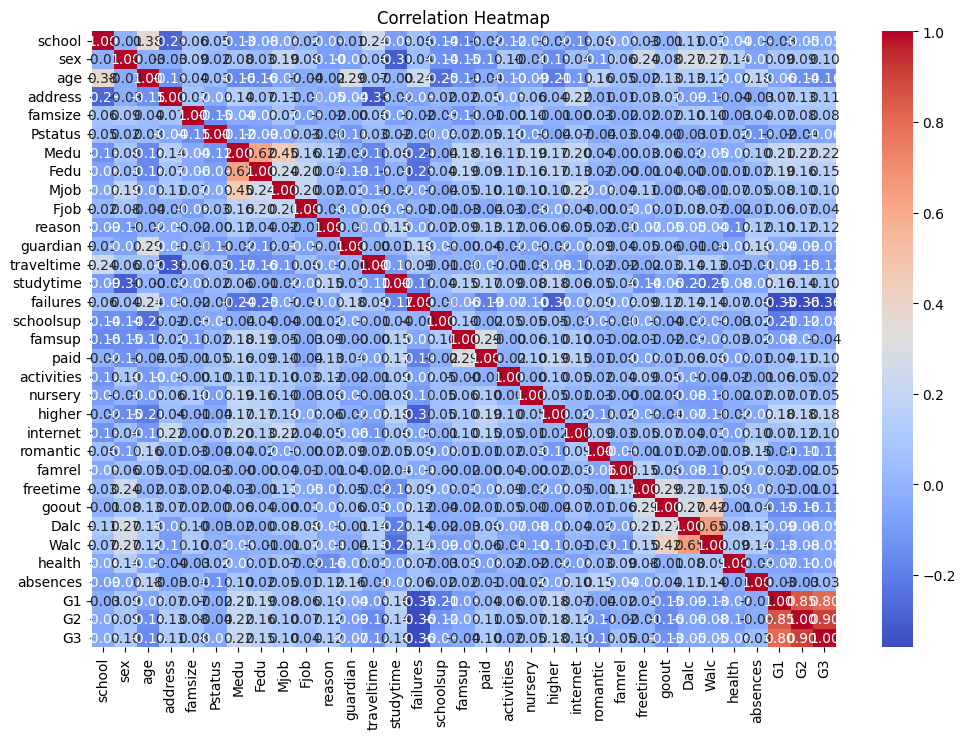

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


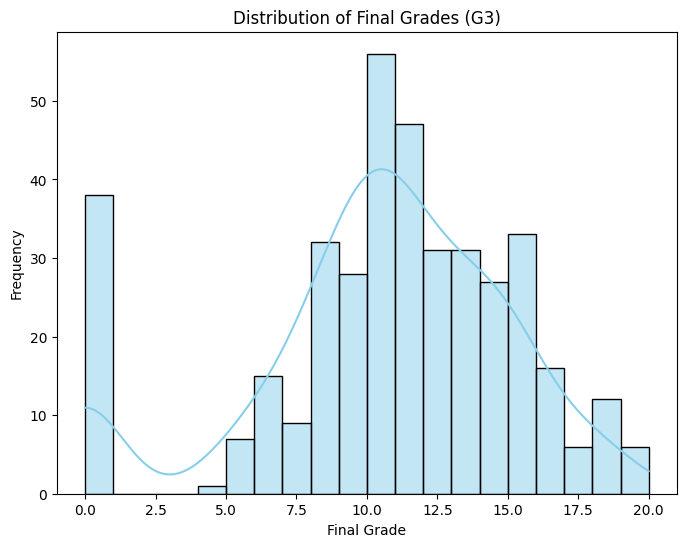

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data['G3'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()


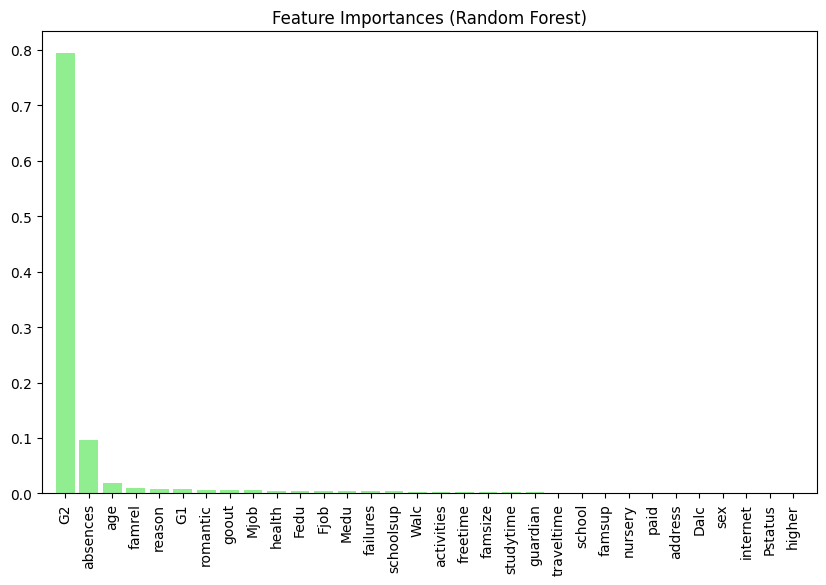

In [14]:
import numpy as np

# Feature Importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], color='lightgreen', align='center')
plt.xticks(range(X_train.shape[1]), data.columns[:-1][indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


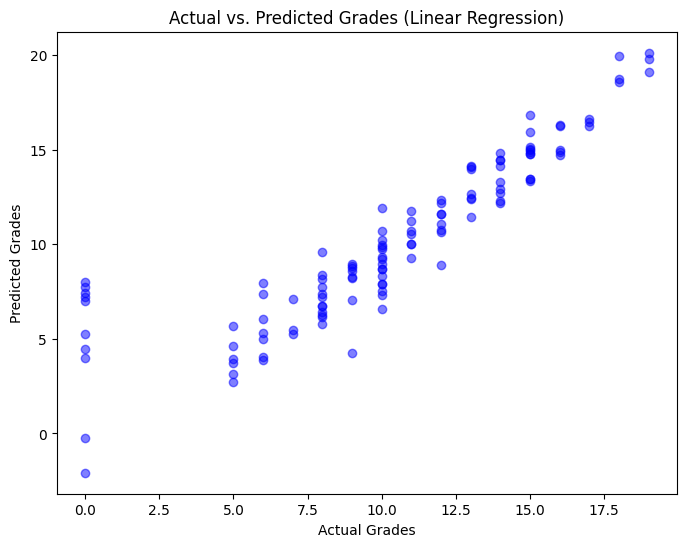

In [18]:
# Linear Regression
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.title("Actual vs. Predicted Grades (Linear Regression)")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()




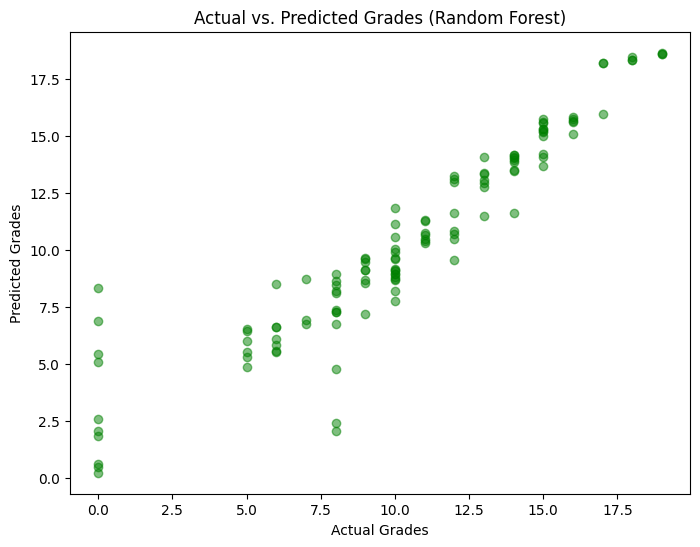

In [16]:
# Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.title("Actual vs. Predicted Grades (Random Forest)")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()



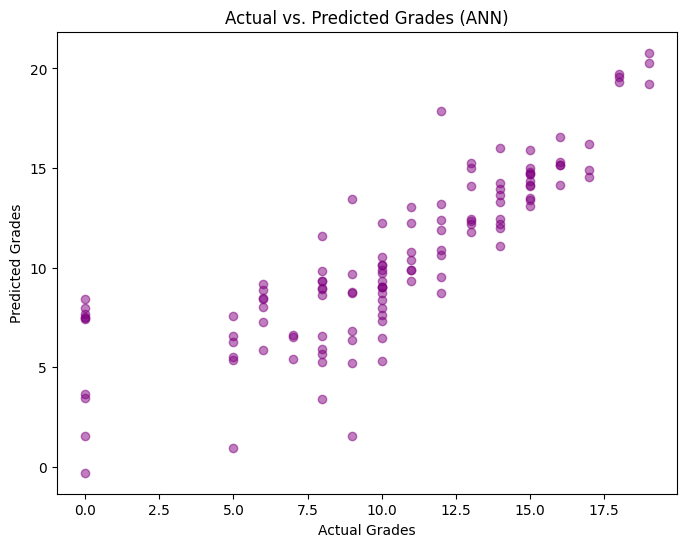

In [17]:
# ANN
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ann, color='purple', alpha=0.5)
plt.title("Actual vs. Predicted Grades (ANN)")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()

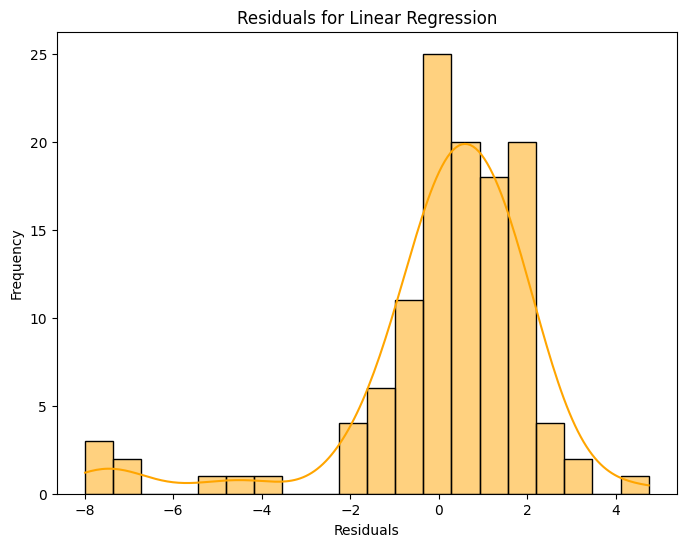

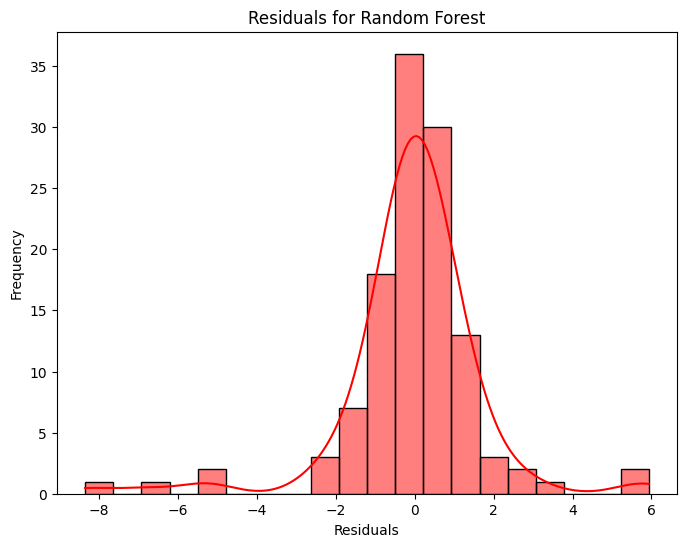

In [19]:
# Residuals for Linear Regression
residuals_lr = y_test - y_pred_lr

plt.figure(figsize=(8,6))
sns.histplot(residuals_lr, bins=20, kde=True, color='orange')
plt.title("Residuals for Linear Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,6))
sns.histplot(residuals_rf, bins=20, kde=True, color='red')
plt.title("Residuals for Random Forest")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
